# Step 1: Importing the libraries

In [1]:
# To work with audio and perform analysis on it. 
import librosa
import librosa.display

# search for files where the filename matches a certain pattern by using wildcard characters -> character used to represent multiple characters.
from glob import glob

# To play sound in the notebook
import IPython.display as ipd 

# For fetching the contents of a directory and to do some operating system operations
import os

# For the visualizations
import matplotlib.pyplot as plt

# For creating the dataframe and playing with it
import pandas as pd

# For doing linear algebra
import numpy as np

# To connect matplotlib backend to inline backend
%matplotlib inline

# Step 2: Extracting files from the Folders and Making dataframe
First we have chosen SAVEE folder and we will iterative through each and every file in this folder and based on alphabets such as (_a,_d,_f,_h,_n,_sa,_su) we will label the files as : ( angry , disgust , fear , happy , neutral , sad , surprise and error if none)

In [2]:
os.chdir(r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Savee")
print(os.getcwd())

C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Savee


In [3]:
SAVEE_PATH = (r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Savee")
# For getting all files in the list
files = os.listdir()

# Empty list to store the emotion and the path
emotion = []
path = []
for file in files:
    if file[2:4] == '_a':
        emotion.append("angry")
    elif file[2:4] == '_d':
        emotion.append("disgust")
    elif file[2:4] == '_f':
        emotion.append("fear")
    elif file[2:4] == '_h':
        emotion.append("happy")
    elif file[2:4] == '_n':
        emotion.append("neutral")
    elif file[2:5] == '_sa':
        emotion.append("sad")
    elif file[2:5] == '_su':
        emotion.append("surprise")
    else:
        emotion.append("error_male")  # We will remove such files later during data cleaning
    path.append(SAVEE_PATH +'\\'+ file)

In [4]:
# Now we will create 2 dataframes ( emotion ) and ( path ) , then we will concatinate both
SAVEE_emotions = pd.DataFrame(emotion,columns=["emotions"])
SAVEE_path = pd.DataFrame(path,columns=["path"])

In [5]:
# Adding another column in the SAVEE_emotion dataframe 
SAVEE_emotions["root_dir"] = "SAVEE"

In [6]:
# Now let us concatinate both the dataframes horizontally
SAVEE_dataframe = pd.concat([SAVEE_emotions,SAVEE_path], axis = 1)

SAVEE_dataframe

emotions root_dir                                               path
0       angry    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
1       angry    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
2       angry    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
3       angry    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
4       angry    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
..        ...      ...                                                ...
475  surprise    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
476  surprise    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
477  surprise    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
478  surprise    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
479  surprise    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...

[480 rows x 3 columns]

In [7]:
SAVEE_dataframe.shape

(480, 3)

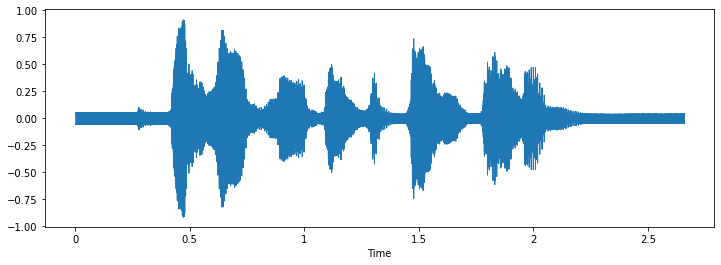

In [8]:
# Let's listen 1 audio from (SAVEE_dataframe) 
test_audio_SAVEE = (SAVEE_dataframe['path'][10])  
data, sampling_rate = librosa.load(test_audio_SAVEE)  # Caculating the data and sampling rate

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

# For playing the audio in jupyter notebook 
ipd.Audio(test_audio_SAVEE)

Just like we collected files from the SAVEE folder and created dataframe , the same we will do for the TEES folder which contains the data for females

In [9]:
os.chdir(r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Tess")
print(os.getcwd())

C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Tess


In [10]:
folder = os.listdir()
TEES_path = (r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Tess")

# List to store the emotions and the path
emotion = []
path = []

for fold in folder:
    folder_path = os.listdir(TEES_path + "\\" + fold) # We are making path of the folder and then storing files in it in list
    for file in folder_path:
        if fold == 'OAF_angry' or fold == 'YAF_angry':
            emotion.append('angry')
        elif fold == 'OAF_disgust' or fold == 'YAF_disgust':
            emotion.append('disgust')
        elif fold == 'OAF_Fear' or fold == 'YAF_fear':
            emotion.append('fear')
        elif fold == 'OAF_happy' or fold == 'YAF_happy':
            emotion.append('happy')
        elif fold == 'OAF_neutral' or fold == 'YAF_neutral':
            emotion.append('neutral')                                
        elif fold == 'OAF_Pleasant_surprise' or fold == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif fold == 'OAF_Sad' or fold == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('error_female')
        path.append(TEES_path + "\\" + fold + "\\" + file)

In [11]:
# Now we will create 2 dataframes ( emotion ) and ( path ) , then we will concatinate both
TEES_emotions = pd.DataFrame(emotion,columns=["emotions"])
TEES_path = pd.DataFrame(path,columns=["path"])

In [12]:
# Adding another column in the TEES_emotion dataframe 
TEES_emotions["root_dir"] = "TEES"

In [13]:
# Now let us concatinate both the dataframes horizontally
TEES_dataframe = pd.concat([TEES_emotions,TEES_path], axis = 1)

TEES_dataframe

emotions root_dir                                               path
0       angry     TEES  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
1       angry     TEES  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
2       angry     TEES  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
3       angry     TEES  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
4       angry     TEES  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
...       ...      ...                                                ...
2795      sad     TEES  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
2796      sad     TEES  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
2797      sad     TEES  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
2798      sad     TEES  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
2799      sad     TEES  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...

[2800 rows x 3 columns]

In [14]:
TEES_dataframe.shape

(2800, 3)

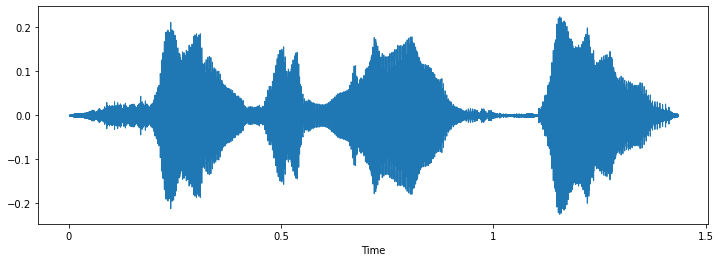

In [15]:
# Let's listen 1 audio from (SAVEE_dataframe) 
test_audio_TEES = (TEES_dataframe['path'][10])  
data, sampling_rate = librosa.load(test_audio_TEES)  # Caculating the data and sampling rate

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

# For playing the audio in jupyter notebook 
ipd.Audio(test_audio_TEES)

Repeating the same process for the Ravdess folder as well

In [16]:
os.chdir(r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Ravdess")
print(os.getcwd())

C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Ravdess


In [17]:
folder = os.listdir()
RAVDESS_path = (r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Ravdess")

# Empty list for storing emotion , path and gender
emotion = []
path = []
gender = []

for fold in folder:
    folder_path = os.listdir(RAVDESS_path + '\\' + fold)
    for file in folder_path:
        file_num_info = file.split('.')[0].split('-')
        emotion.append(int(file_num_info[2]))
        check_gender = int(file_num_info[6])
        if check_gender % 2 == 0:
            gender.append("female")
        else:
            gender.append("male")
        path.append(RAVDESS_path + '\\' + fold + '\\' + file)    
        

file = "03-01-01-01-01-01-01.wav"

part = file.split('.')[0].split('-')

part[2] -> This will give us the emotion

part[6] -> This number will help us to figure out the gender

In [18]:
# Now we will create 2 dataframes ( emotion ) and ( path ) , then we will concatinate both
RAVDESS_emotions = pd.DataFrame(emotion,columns=["emotions"])
RAVDESS_path = pd.DataFrame(path,columns=["path"])
RAVDESS_gender = pd.DataFrame(gender,columns=["gender"])

# Now we will replace the integer values with emotional tags
RAVDESS_emotions = RAVDESS_emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})

# Adding another column in the RAVDESS_emotion dataframe 
RAVDESS_emotions["root_dir"] = "RAVDESS"

# Concatinating all 3 dataframes
RAVDESS_dataframe = pd.concat([RAVDESS_emotions,RAVDESS_path,RAVDESS_gender],axis = 1)
RAVDESS_dataframe

emotions root_dir                                               path  \
0      neutral  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
1      neutral  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
2      neutral  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
3      neutral  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
4      neutral  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
...        ...      ...                                                ...   
1435  surprise  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
1436  surprise  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
1437  surprise  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
1438  surprise  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
1439  surprise  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   

      gender  
0       male  
1       male  
2       male  
3       male  
4       male  
...      ...  
1435  female  
1436  female  
1437  female  
1438  female  
1439  female  

[1440 rows x 4 columns]

In [19]:
# Now we will drop the gender column
RAVDESS_dataframe = RAVDESS_dataframe.drop('gender',axis = 1)

In [20]:
RAVDESS_dataframe.shape

(1440, 3)

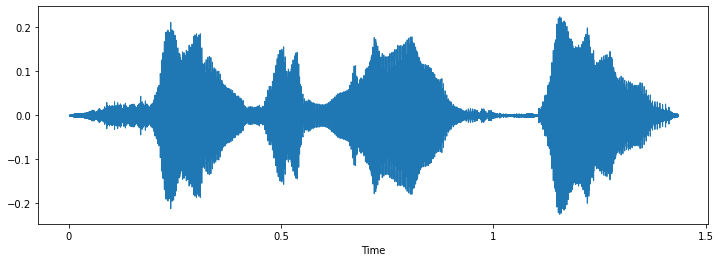

In [21]:
# Let's listen 1 audio from (SAVEE_dataframe) 
test_audio_RAVDESS = (RAVDESS_dataframe['path'][11])  
data, sampling_rate = librosa.load(test_audio_TEES)  # Caculating the data and sampling rate

# Sampling rate means for how many number of times the audio is being measured in terms of killo-hertz per second
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

# For playing the audio in jupyter notebook 
ipd.Audio(test_audio_RAVDESS)

In [22]:
# Now we will be concatinating all the 3 dataframes together
dataframe = pd.concat([SAVEE_dataframe,TEES_dataframe,RAVDESS_dataframe],axis = 0)
dataframe.shape

(4720, 3)

In [23]:
dataframe['emotions'].value_counts()

neutral     808
angry       652
disgust     652
fear        652
happy       652
sad         652
surprise    652
Name: emotions, dtype: int64

<AxesSubplot:ylabel='emotions'>

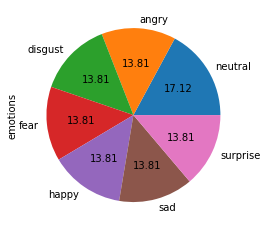

In [24]:
dataframe['emotions'].value_counts().plot(kind='pie', autopct='%.2f')

In [25]:
os.chdir(r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition")
print(os.getcwd())

C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition


In [26]:
# Now let us save the dataframe as csv file
dataframe.to_csv("Data.csv",index=False)

# Step 3: Feature Extraction using MFCC
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

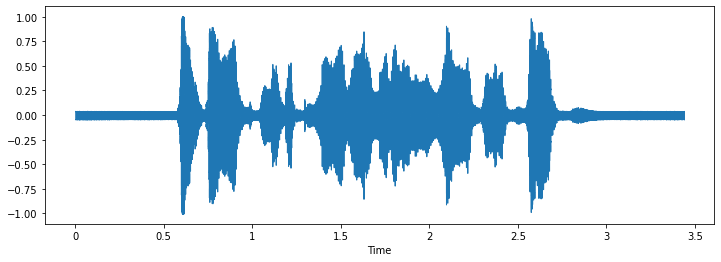

In [27]:
# First of all to better understand what's going we will take one sample audio from the dataframe
test_audio = (r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Savee\DC_a02.wav")
data, sampling_rate = librosa.load(test_audio)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

# For playing the audio in jupyter notebook 
ipd.Audio(test_audio)

In [28]:
mfccs = librosa.feature.mfcc(y = data, sr = sampling_rate, n_mfcc=40)
print(mfccs.shape)
mfccs

(40, 149)


array([[-3.5844635e+02, -4.0131088e+02, -4.6355399e+02, ...,
        -4.6648755e+02, -4.1496332e+02, -3.5554132e+02],
       [ 1.0824090e+02,  8.5431519e+01,  2.9035046e+01, ...,
         3.9545406e+01,  8.7091797e+01,  1.0552022e+02],
       [ 1.9235243e+01,  3.0303055e+01,  1.9361710e+01, ...,
         3.4202545e+01,  3.8909927e+01,  2.4273712e+01],
       ...,
       [ 1.2233393e+00,  2.2715092e+00,  2.3036366e+00, ...,
         2.2974944e-01,  1.8172998e+00,  1.6696582e+00],
       [ 1.6718855e+00,  6.3547242e-01, -2.8101687e+00, ...,
         1.4812318e+00,  1.8749182e+00,  1.0716894e+00],
       [ 1.3288375e+00,  2.7747667e+00,  3.6193895e+00, ...,
         3.4042859e+00,  1.8078840e+00,  1.4314456e+00]], dtype=float32)

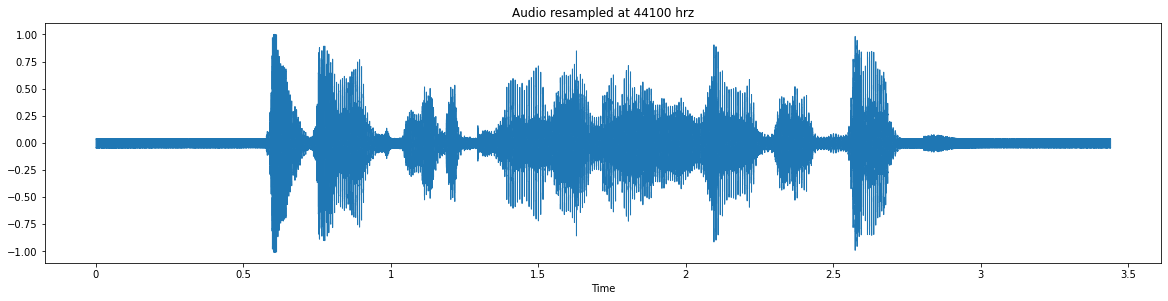

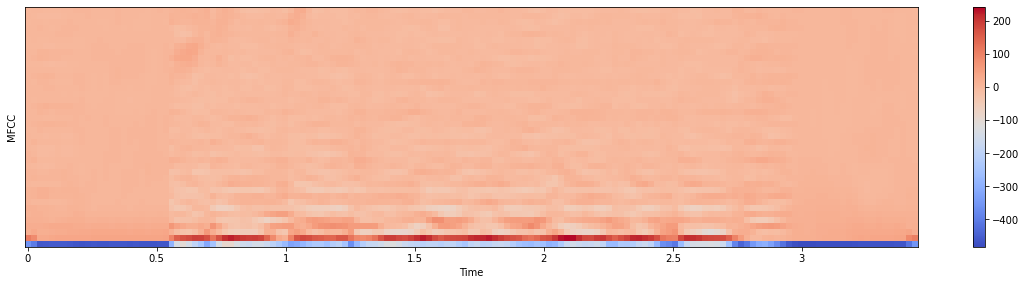

In [29]:
# Plotting the audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Audio resampled at 44100 hrz')

# Plotting the Mel Frequency Cepstral Coefficients
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)

# Here we are displaying Spectrogram for the audio file
librosa.display.specshow(mfccs, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(test_audio)

Now we will extract the features from the entire dataset audio files and store it in the new dataframe . After storing the extracted features from the 

In [30]:
# Now we will extract the features for all the audio files and for that we will first create a new dataframe 
features = pd.DataFrame(columns = ['feature_extracted'])

index = 0
for audio_file in dataframe['path']:
    data, sample_rate = librosa.load(audio_file, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5) 
    # Creating an numpy array of the sample rate
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13),axis=0)
    features.loc[index] = [mfccs]
    index = index + 1 

In [31]:
# Checking some of rows in the feature dataset from the top
features.head(10)

feature_extracted
0  [-4.641421, -3.860898, -6.2191906, -5.9265423,...
1  [-8.690717, -12.522838, -22.928043, -23.243807...
2  [-8.81486, -12.819055, -24.178183, -23.84745, ...
3  [-2.2684255, -4.317077, -12.285238, -13.083024...
4  [-13.485307, -16.260424, -25.884357, -27.82704...
5  [-6.9577174, -11.054884, -21.922634, -20.66453...
6  [-8.526944, -11.796119, -21.22516, -20.821096,...
7  [-15.653052, -18.967167, -22.91287, -23.200481...
8  [-16.068066, -19.428709, -24.262356, -24.28255...
9  [-10.672841, -5.4241343, -5.4943166, -5.352930...

In [32]:
dataframe.reset_index(inplace=True, drop=True)
dataframe = pd.concat([dataframe,pd.DataFrame(features['feature_extracted'].values.tolist())],axis=1)
dataframe

emotions root_dir                                               path  \
0        angry    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
1        angry    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
2        angry    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
3        angry    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
4        angry    SAVEE  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
...        ...      ...                                                ...   
4715  surprise  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
4716  surprise  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
4717  surprise  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
4718  surprise  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   
4719  surprise  RAVDESS  C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...   

              0          1          2          3          4          5  \
0     -4.641421  -3.860898  -6.219191  -5.926542  -5.850419  -4.808960   
1     -8.690717 -12.522838 -22.928043 -23.243807 -22.926605 -23.432243   
2     -8.814860 -12.819055 -24.178183 -23.847450 -15.182783 -10.732485   
3     -2.268425  -4.317077 -12.285238 -13.083024 -12.041327 -11.819768   
4    -13.485307 -16.260424 -25.884357 -27.827044 -27.593534 -26.666508   
...         ...        ...        ...        ...        ...        ...   
4715 -58.988789 -58.988789 -60.665401 -60.689507 -59.735493 -60.501419   
4716 -54.676941 -54.676941 -54.676941 -54.676941 -54.676941 -54.676941   
4717 -56.940857 -56.940857 -56.940857 -56.940857 -56.940857 -56.943394   
4718 -55.255539 -55.255539 -55.187035 -55.345676 -55.053749 -53.088646   
4719 -50.365986 -45.987160 -46.047646 -46.526577 -47.946865 -44.790745   

              6  ...        206        207        208        209        210  \
0     -2.513003  ...  -4.088851  -5.023864  -5.254715  -5.234094  -5.310308   
1    -14.830002  ... -22.627258 -22.633406 -22.511599 -24.300154 -24.496809   
2     -8.681472  ...        NaN        NaN        NaN        NaN        NaN   
3     -9.414148  ...        NaN        NaN        NaN        NaN        NaN   
4    -18.659025  ... -25.291666 -25.854906 -26.821354 -25.436455 -24.179941   
...         ...  ...        ...        ...        ...        ...        ...   
4715 -60.420444  ... -58.988789 -58.988789 -58.988789 -58.916409 -58.988789   
4716 -54.676941  ... -38.600639 -38.011581 -40.038265 -39.658634 -40.551571   
4717 -57.077065  ... -43.488461 -42.689346 -44.227230 -44.102493 -43.651882   
4718 -52.200443  ... -47.927639 -50.145695 -48.712666 -47.603497 -45.205952   
4719 -43.490250  ... -43.185616 -45.282024 -48.504402 -50.358364 -44.687706   

            211        212        213        214        215  
0     -5.621666  -6.072197  -6.611348  -3.999875   1.390506  
1    -22.895985 -23.511503 -24.342152 -16.465857  -8.936035  
2           NaN        NaN        NaN        NaN        NaN  
3           NaN        NaN        NaN        NaN        NaN  
4    -23.281618 -24.167494 -25.228062 -20.599659 -15.929615  
...         ...        ...        ...        ...        ...  
4715 -58.988789 -58.988789 -58.988789 -58.988789 -58.988789  
4716 -43.560444 -45.444828 -46.496380 -46.509609 -47.877892  
4717 -45.493961 -47.760014 -50.536911 -51.330254 -51.383324  
4718 -44.439209 -48.721008 -50.850864 -50.322186 -50.131546  
4719 -43.194721 -46.666878 -50.128296 -51.011162 -51.096489  

[4720 rows x 219 columns]

In [33]:
# Now we will drop the path column in the dataframe
dataframe = dataframe.drop(['path'],axis=1)
dataframe

emotions root_dir          0          1          2          3  \
0        angry    SAVEE  -4.641421  -3.860898  -6.219191  -5.926542   
1        angry    SAVEE  -8.690717 -12.522838 -22.928043 -23.243807   
2        angry    SAVEE  -8.814860 -12.819055 -24.178183 -23.847450   
3        angry    SAVEE  -2.268425  -4.317077 -12.285238 -13.083024   
4        angry    SAVEE -13.485307 -16.260424 -25.884357 -27.827044   
...        ...      ...        ...        ...        ...        ...   
4715  surprise  RAVDESS -58.988789 -58.988789 -60.665401 -60.689507   
4716  surprise  RAVDESS -54.676941 -54.676941 -54.676941 -54.676941   
4717  surprise  RAVDESS -56.940857 -56.940857 -56.940857 -56.940857   
4718  surprise  RAVDESS -55.255539 -55.255539 -55.187035 -55.345676   
4719  surprise  RAVDESS -50.365986 -45.987160 -46.047646 -46.526577   

              4          5          6          7  ...        206        207  \
0     -5.850419  -4.808960  -2.513003  -3.500536  ...  -4.088851  -5.023864   
1    -22.926605 -23.432243 -14.830002  -8.285514  ... -22.627258 -22.633406   
2    -15.182783 -10.732485  -8.681472  -8.655433  ...        NaN        NaN   
3    -12.041327 -11.819768  -9.414148  -8.153646  ...        NaN        NaN   
4    -27.593534 -26.666508 -18.659025 -11.698080  ... -25.291666 -25.854906   
...         ...        ...        ...        ...  ...        ...        ...   
4715 -59.735493 -60.501419 -60.420444 -59.816189  ... -58.988789 -58.988789   
4716 -54.676941 -54.676941 -54.676941 -54.676941  ... -38.600639 -38.011581   
4717 -56.940857 -56.943394 -57.077065 -56.940857  ... -43.488461 -42.689346   
4718 -55.053749 -53.088646 -52.200443 -52.218590  ... -47.927639 -50.145695   
4719 -47.946865 -44.790745 -43.490250 -46.490822  ... -43.185616 -45.282024   

            208        209        210        211        212        213  \
0     -5.254715  -5.234094  -5.310308  -5.621666  -6.072197  -6.611348   
1    -22.511599 -24.300154 -24.496809 -22.895985 -23.511503 -24.342152   
2           NaN        NaN        NaN        NaN        NaN        NaN   
3           NaN        NaN        NaN        NaN        NaN        NaN   
4    -26.821354 -25.436455 -24.179941 -23.281618 -24.167494 -25.228062   
...         ...        ...        ...        ...        ...        ...   
4715 -58.988789 -58.916409 -58.988789 -58.988789 -58.988789 -58.988789   
4716 -40.038265 -39.658634 -40.551571 -43.560444 -45.444828 -46.496380   
4717 -44.227230 -44.102493 -43.651882 -45.493961 -47.760014 -50.536911   
4718 -48.712666 -47.603497 -45.205952 -44.439209 -48.721008 -50.850864   
4719 -48.504402 -50.358364 -44.687706 -43.194721 -46.666878 -50.128296   

            214        215  
0     -3.999875   1.390506  
1    -16.465857  -8.936035  
2           NaN        NaN  
3           NaN        NaN  
4    -20.599659 -15.929615  
...         ...        ...  
4715 -58.988789 -58.988789  
4716 -46.509609 -47.877892  
4717 -51.330254 -51.383324  
4718 -50.322186 -50.131546  
4719 -51.011162 -51.096489  

[4720 rows x 218 columns]

In [34]:
dataframe.isnull().sum()

emotions       0
root_dir       0
0              0
1              0
2              0
            ... 
211         2899
212         2900
213         2901
214         2903
215         2905
Length: 218, dtype: int64

In [35]:
dataframe.duplicated().sum()

1

# Step 4: Handling null values and Implementing Normalization 

Now as we can see that there are a lot of null values present thus first we need to handle the null values and after that we will do feature scaling

In [36]:
new_dataframe = dataframe.interpolate()
new_dataframe

emotions root_dir          0          1          2          3  \
0        angry    SAVEE  -4.641421  -3.860898  -6.219191  -5.926542   
1        angry    SAVEE  -8.690717 -12.522838 -22.928043 -23.243807   
2        angry    SAVEE  -8.814860 -12.819055 -24.178183 -23.847450   
3        angry    SAVEE  -2.268425  -4.317077 -12.285238 -13.083024   
4        angry    SAVEE -13.485307 -16.260424 -25.884357 -27.827044   
...        ...      ...        ...        ...        ...        ...   
4715  surprise  RAVDESS -58.988789 -58.988789 -60.665401 -60.689507   
4716  surprise  RAVDESS -54.676941 -54.676941 -54.676941 -54.676941   
4717  surprise  RAVDESS -56.940857 -56.940857 -56.940857 -56.940857   
4718  surprise  RAVDESS -55.255539 -55.255539 -55.187035 -55.345676   
4719  surprise  RAVDESS -50.365986 -45.987160 -46.047646 -46.526577   

              4          5          6          7  ...        206        207  \
0     -5.850419  -4.808960  -2.513003  -3.500536  ...  -4.088851  -5.023864   
1    -22.926605 -23.432243 -14.830002  -8.285514  ... -22.627258 -22.633406   
2    -15.182783 -10.732485  -8.681472  -8.655433  ... -23.515394 -23.707239   
3    -12.041327 -11.819768  -9.414148  -8.153646  ... -24.403530 -24.781073   
4    -27.593534 -26.666508 -18.659025 -11.698080  ... -25.291666 -25.854906   
...         ...        ...        ...        ...  ...        ...        ...   
4715 -59.735493 -60.501419 -60.420444 -59.816189  ... -58.988789 -58.988789   
4716 -54.676941 -54.676941 -54.676941 -54.676941  ... -38.600639 -38.011581   
4717 -56.940857 -56.943394 -57.077065 -56.940857  ... -43.488461 -42.689346   
4718 -55.053749 -53.088646 -52.200443 -52.218590  ... -47.927639 -50.145695   
4719 -47.946865 -44.790745 -43.490250 -46.490822  ... -43.185616 -45.282024   

            208        209        210        211        212        213  \
0     -5.254715  -5.234094  -5.310308  -5.621666  -6.072197  -6.611348   
1    -22.511599 -24.300154 -24.496809 -22.895985 -23.511503 -24.342152   
2    -23.948184 -24.678921 -24.391186 -23.024529 -23.730167 -24.637455   
3    -25.384769 -25.057688 -24.285564 -23.153074 -23.948830 -24.932758   
4    -26.821354 -25.436455 -24.179941 -23.281618 -24.167494 -25.228062   
...         ...        ...        ...        ...        ...        ...   
4715 -58.988789 -58.916409 -58.988789 -58.988789 -58.988789 -58.988789   
4716 -40.038265 -39.658634 -40.551571 -43.560444 -45.444828 -46.496380   
4717 -44.227230 -44.102493 -43.651882 -45.493961 -47.760014 -50.536911   
4718 -48.712666 -47.603497 -45.205952 -44.439209 -48.721008 -50.850864   
4719 -48.504402 -50.358364 -44.687706 -43.194721 -46.666878 -50.128296   

            214        215  
0     -3.999875   1.390506  
1    -16.465857  -8.936035  
2    -17.843791 -11.267228  
3    -19.221725 -13.598422  
4    -20.599659 -15.929615  
...         ...        ...  
4715 -58.988789 -58.988789  
4716 -46.509609 -47.877892  
4717 -51.330254 -51.383324  
4718 -50.322186 -50.131546  
4719 -51.011162 -51.096489  

[4720 rows x 218 columns]

Now after handling the missing values we will seperate the data into seperate variables X and y , where X -> Independent feature values and y -> Dependent feature vaulues . One more thing to keep in mind is that before doing normalization we will divide the dataset into test and train because normaliaztion = ( value - mean ) / standard deviation so if we will not divide the dataset into test and train then whole of the data will be exposed which we don't want , because we want some data for test purpose also

In [37]:
# Dropping the root dir column from the dataset
new_dataframe = new_dataframe.drop(['root_dir'],axis = 1)
new_dataframe

emotions          0          1          2          3          4  \
0        angry  -4.641421  -3.860898  -6.219191  -5.926542  -5.850419   
1        angry  -8.690717 -12.522838 -22.928043 -23.243807 -22.926605   
2        angry  -8.814860 -12.819055 -24.178183 -23.847450 -15.182783   
3        angry  -2.268425  -4.317077 -12.285238 -13.083024 -12.041327   
4        angry -13.485307 -16.260424 -25.884357 -27.827044 -27.593534   
...        ...        ...        ...        ...        ...        ...   
4715  surprise -58.988789 -58.988789 -60.665401 -60.689507 -59.735493   
4716  surprise -54.676941 -54.676941 -54.676941 -54.676941 -54.676941   
4717  surprise -56.940857 -56.940857 -56.940857 -56.940857 -56.940857   
4718  surprise -55.255539 -55.255539 -55.187035 -55.345676 -55.053749   
4719  surprise -50.365986 -45.987160 -46.047646 -46.526577 -47.946865   

              5          6          7          8  ...        206        207  \
0     -4.808960  -2.513003  -3.500536  -3.721045  ...  -4.088851  -5.023864   
1    -23.432243 -14.830002  -8.285514  -4.114430  ... -22.627258 -22.633406   
2    -10.732485  -8.681472  -8.655433  -7.889995  ... -23.515394 -23.707239   
3    -11.819768  -9.414148  -8.153646 -11.953333  ... -24.403530 -24.781073   
4    -26.666508 -18.659025 -11.698080 -10.721750  ... -25.291666 -25.854906   
...         ...        ...        ...        ...  ...        ...        ...   
4715 -60.501419 -60.420444 -59.816189 -60.189209  ... -58.988789 -58.988789   
4716 -54.676941 -54.676941 -54.676941 -54.676941  ... -38.600639 -38.011581   
4717 -56.943394 -57.077065 -56.940857 -56.940857  ... -43.488461 -42.689346   
4718 -53.088646 -52.200443 -52.218590 -52.634140  ... -47.927639 -50.145695   
4719 -44.790745 -43.490250 -46.490822 -50.799492  ... -43.185616 -45.282024   

            208        209        210        211        212        213  \
0     -5.254715  -5.234094  -5.310308  -5.621666  -6.072197  -6.611348   
1    -22.511599 -24.300154 -24.496809 -22.895985 -23.511503 -24.342152   
2    -23.948184 -24.678921 -24.391186 -23.024529 -23.730167 -24.637455   
3    -25.384769 -25.057688 -24.285564 -23.153074 -23.948830 -24.932758   
4    -26.821354 -25.436455 -24.179941 -23.281618 -24.167494 -25.228062   
...         ...        ...        ...        ...        ...        ...   
4715 -58.988789 -58.916409 -58.988789 -58.988789 -58.988789 -58.988789   
4716 -40.038265 -39.658634 -40.551571 -43.560444 -45.444828 -46.496380   
4717 -44.227230 -44.102493 -43.651882 -45.493961 -47.760014 -50.536911   
4718 -48.712666 -47.603497 -45.205952 -44.439209 -48.721008 -50.850864   
4719 -48.504402 -50.358364 -44.687706 -43.194721 -46.666878 -50.128296   

            214        215  
0     -3.999875   1.390506  
1    -16.465857  -8.936035  
2    -17.843791 -11.267228  
3    -19.221725 -13.598422  
4    -20.599659 -15.929615  
...         ...        ...  
4715 -58.988789 -58.988789  
4716 -46.509609 -47.877892  
4717 -51.330254 -51.383324  
4718 -50.322186 -50.131546  
4719 -51.011162 -51.096489  

[4720 rows x 217 columns]

In [38]:
# Seperating the dataset into 2 variables
X = new_dataframe.drop(['emotions'],axis = 1)
y = new_dataframe.emotions

In [39]:
# Now we will be do the test - train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3,random_state = 0)

In [40]:
# Let us apply normalization for feature scaling 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[0.84218825, 0.7975662 , 0.56463651, ..., 0.31304741, 0.28128602,
        0.23940037],
       [0.67340673, 0.63646257, 0.5554154 , ..., 0.50093182, 0.44316088,
        0.35888517],
       [0.32548436, 0.3471862 , 0.34742077, ..., 0.65775782, 0.64279808,
        0.58970628],
       ...,
       [0.70447213, 0.66154569, 0.54485475, ..., 0.49076967, 0.4645007 ,
        0.38234764],
       [0.7774345 , 0.7660828 , 0.65779027, ..., 0.32056279, 0.28776102,
        0.24417976],
       [0.75884129, 0.73082807, 0.62910398, ..., 0.29209545, 0.26323453,
        0.226076  ]])

In [41]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train

0         1         2         3         4         5         6    \
0     0.842188  0.797566  0.564637  0.545121  0.600818  0.668534  0.686501   
1     0.673407  0.636463  0.555415  0.573165  0.619141  0.613057  0.608556   
2     0.325484  0.347186  0.347421  0.351604  0.366295  0.372554  0.367132   
3     0.239563  0.244989  0.237938  0.243988  0.254358  0.252627  0.253960   
4     0.752673  0.716061  0.484689  0.516272  0.541520  0.508711  0.530239   
...        ...       ...       ...       ...       ...       ...       ...   
3299  0.752902  0.710666  0.550245  0.552223  0.593361  0.573419  0.560909   
3300  0.789312  0.761167  0.600894  0.605271  0.659153  0.666004  0.708435   
3301  0.704472  0.661546  0.544855  0.547182  0.559908  0.565674  0.574537   
3302  0.777434  0.766083  0.657790  0.668465  0.687130  0.637450  0.643057   
3303  0.758841  0.730828  0.629104  0.660958  0.676775  0.664742  0.670886   

           7         8         9    ...       206       207       208  \
0     0.674854  0.678645  0.649581  ...  0.318797  0.293998  0.237921   
1     0.610984  0.598567  0.597893  ...  0.455413  0.471630  0.406146   
2     0.368380  0.383887  0.362380  ...  0.537810  0.538476  0.542898   
3     0.259146  0.261569  0.254401  ...  0.523232  0.535206  0.516844   
4     0.564729  0.635691  0.606621  ...  0.380895  0.374740  0.314387   
...        ...       ...       ...  ...       ...       ...       ...   
3299  0.544515  0.553927  0.538734  ...  0.576354  0.572456  0.559343   
3300  0.774580  0.787821  0.753487  ...  0.215465  0.159643  0.110682   
3301  0.585828  0.571772  0.555282  ...  0.529670  0.514798  0.477954   
3302  0.688406  0.664860  0.651920  ...  0.324262  0.301103  0.244650   
3303  0.707081  0.751726  0.731426  ...  0.303562  0.274189  0.219162   

           209       210       211       212       213       214       215  
0     0.273675  0.264293  0.260146  0.262470  0.313047  0.281286  0.239400  
1     0.465792  0.441972  0.436036  0.454047  0.500932  0.443161  0.358885  
2     0.547312  0.515711  0.536057  0.580612  0.657758  0.642798  0.589706  
3     0.544988  0.505005  0.443862  0.412813  0.435360  0.387263  0.335679  
4     0.361001  0.345056  0.340096  0.349551  0.398449  0.354866  0.293712  
...        ...       ...       ...       ...       ...       ...       ...  
3299  0.572001  0.569767  0.562869  0.526788  0.511622  0.494929  0.472142  
3300  0.128365  0.129903  0.127109  0.117569  0.170938  0.158850  0.149026  
3301  0.504722  0.544719  0.538657  0.507703  0.490770  0.464501  0.382348  
3302  0.281360  0.271400  0.267181  0.270134  0.320563  0.287761  0.244180  
3303  0.252251  0.244479  0.240531  0.241107  0.292095  0.263235  0.226076  

[3304 rows x 216 columns]

In [42]:
# Let us do the label encoding for the categorical output data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [43]:
label.fit(y_train)

LabelEncoder()

In [63]:
y_train = label.transform(y_train)
y_test = label.transform(y_test)
y_test

C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [56]:
# To check total number of expected outputs
num_labels = y_test.nunique()
num_labels

0    7
dtype: int64

In [48]:
X_train.shape

(3304, 216)

# Step 6: Creating and Training Convolutional Neural Network

In [46]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [57]:
model=Sequential()

## first layer
model.add(Dense(100,input_shape=(216,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               21700     
                                                                 
 activation_3 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               20200     
                                                                 
 activation_4 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 100)              

In [59]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [62]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=(r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Model"), 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


# To get total time required to train the model
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 7) are incompatible


# Step 7: Analyzing the accuracy of the Model